In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas_datareader import data
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn import linear_model
from tqdm.notebook import tqdm

In [2]:
fig_size_1 = (12, 4)
fig_size_2 = (8, 4)
fig_size_3 = (6, 6)

one_week = (datetime.today()-relativedelta(days=7)).strftime('%Y-%m-%d')
one_month = (datetime.today()-relativedelta(months=1)).strftime('%Y-%m-%d')
three_months = (datetime.today()-relativedelta(months=3)).strftime('%Y-%m-%d')
six_months = (datetime.today()-relativedelta(months=6)).strftime('%Y-%m-%d')
one_year = (datetime.today()-relativedelta(years=1)).strftime('%Y-%m-%d')
today = datetime.today().strftime('%Y-%m-%d')

start_date = one_year
end_date = today

In [3]:
tickers = ['AMZN', 'AAPL', 'FB', 'GOOGL', 'MSFT', 'UBER',
           'BABA', 'JD', 'BA', 'DAL', 'UAL', 'AAL', 'XOM',
           'XLE', 'XLU', 'IVV']

num_shares = {'AMZN': 17, 'AAPL': 208, 'FB': 74, 'GOOGL': 10, 'MSFT': 87, 'UBER': 554,
              'BABA': 91, 'JD': 68, 'BA': 87, 'DAL': 141, 'UAL': 129, 'AAL': 316, 'XOM': 361,
              'XLE': 431, 'XLU': 56, 'IVV': 22,
              'CASH': (74130.42+68184.26+9000)}

cost_basis = {'AMZN': 1708.54, 'AAPL': 45.57, 'FB': 168.62, 'GOOGL': 1110.79, 'MSFT': 95.20, 'UBER': 21.65,
              'BABA': 218.04, 'JD': 73.09, 'BA': 137.98, 'DAL': 23.61, 'UAL': 25.73, 'AAL': 10.54, 'XOM': 41.51,
              'XLE': 30.12, 'XLU': 59.49, 'IVV': 247.73,
              'CASH': 1}

asset_type = {'AMZN': 'Stock', 'AAPL': 'Stock', 'FB': 'Stock', 'GOOGL': 'Stock', 'MSFT': 'Stock', 'UBER': 'Stock',
              'BABA': 'Stock', 'JD': 'Stock', 'BA': 'Stock', 'DAL': 'Stock', 'UAL': 'Stock', 'AAL': 'Stock', 'XOM': 'Stock',
              'XLE': 'Sector', 'XLU': 'Sector', 'IVV': 'Index',
              'CASH': 'Cash'}

In [4]:
df = pd.DataFrame()

for ticker in tqdm(tickers):
    df_temp = data.DataReader(ticker, 'yahoo', start_date, end_date).reset_index()[['Date', 'Close']]
    df_temp['Ticker'] = [ticker] * len(df_temp)
    df_temp['Shares'] = [num_shares[ticker]] * len(df_temp)
    df_temp['Type'] = [asset_type[ticker]] * len(df_temp)
    df_temp['Cost'] = [cost_basis[ticker]] * len(df_temp)
    df = df.append(df_temp)

df = df.append({'Ticker': 'CASH', 'Date' : df['Date'].max() , 'Close' : 1, 'Shares': num_shares['CASH'],
                'Type': asset_type['CASH'], 'Cost': cost_basis['CASH']}, ignore_index=True)

df['Mkt Val'] = df['Shares'] * df['Close']
df['Cost Basis'] = df['Shares'] * df['Cost']
df['Change'] = df['Mkt Val'] - df['Cost Basis']
df['Change %'] = 100*df['Change']/df['Cost Basis']

df_final = df.groupby(['Ticker']).tail(1).set_index('Ticker')
df_final['Mkt Val %'] = 100*df_final['Mkt Val']/df_final['Mkt Val'].sum()
df_final['Cost Basis %'] = 100*df_final['Cost Basis']/df_final['Cost Basis'].sum()
df_final = df_final.round(2)
df_final.sort_values(by='Mkt Val %', ascending=False)

  0%|          | 0/16 [00:00<?, ?it/s]

,Date,Close,Shares,Type,Cost,Mkt Val,Cost Basis,Change,Change %,Mkt Val %,Cost Basis %
Ticker,,,,,,,,,,,
CASH,2021-06-25,1.00,151314.68,Cash,1.00,151314.68,151314.68,0.00,0.00,32.44,47.70
AMZN,2021-06-25,3401.46,17.00,Stock,1708.54,57824.82,29045.18,28779.64,99.09,12.40,9.16
UBER,2021-06-25,51.73,554.00,Stock,21.65,28658.42,11994.10,16664.32,138.94,6.14,3.78
AAPL,2021-06-25,133.11,208.00,Stock,45.57,27686.88,9478.56,18208.32,192.10,5.94,2.99
FB,2021-06-25,341.37,74.00,Stock,168.62,25261.38,12477.88,12783.50,102.45,5.42,3.93
GOOGL,2021-06-25,2450.17,10.00,Stock,1110.79,24501.70,11107.90,13393.80,120.58,5.25,3.50
XLE,2021-06-25,55.34,431.00,Sector,30.12,23851.54,12981.72,10869.82,83.73,5.11,4.09
XOM,2021-06-25,64.66,361.00,Stock,41.51,23342.26,14985.11,8357.15,55.77,5.00,4.72
MSFT,2021-06-25,265.02,87.00,Stock,95.20,23056.74,8282.40,14774.34,178.38,4.94,2.61


<AxesSubplot:title={'center':'Change'}, xlabel='Ticker'>

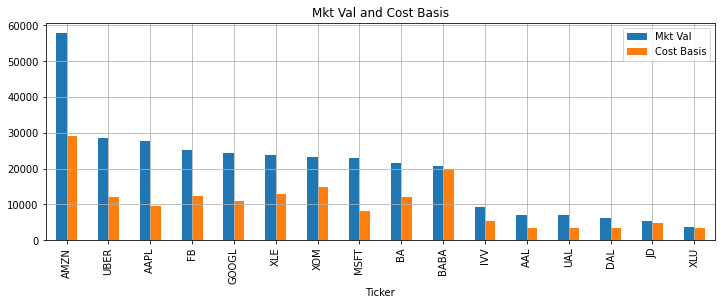

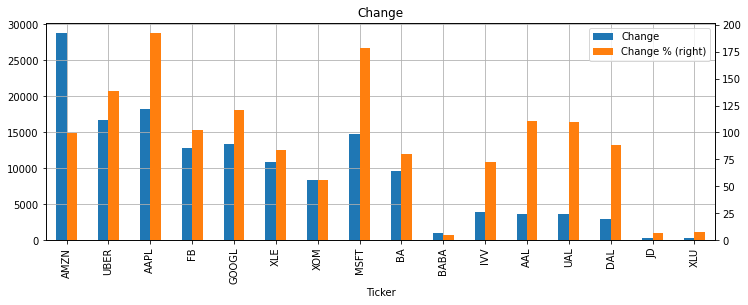

In [5]:
df_final[df_final['Cost'] != 1].sort_values(by='Mkt Val', ascending=False).plot(
    y=['Mkt Val', 'Cost Basis'],
    kind='bar', figsize=fig_size_1, grid=True,
    title='Mkt Val and Cost Basis')
df_final[df_final['Cost'] != 1].sort_values(by='Mkt Val', ascending=False).plot(
    y=['Change', 'Change %'], secondary_y='Change %',
    kind='bar', figsize=fig_size_1, grid=True,
    title='Change')

In [6]:
df_final_type = df_final.groupby('Type').sum()[['Mkt Val', 'Cost Basis']]
df_final_type['Mkt Val %'] = 100*df_final_type['Mkt Val']/df_final_type['Mkt Val'].sum()
df_final_type['Cost Basis %'] = 100*df_final_type['Cost Basis']/df_final_type['Cost Basis'].sum()
df_final_type['Change'] = df_final_type['Mkt Val'] - df_final_type['Cost Basis']
df_final_type['Change %'] = 100 * df_final_type['Change'] / df_final_type['Cost Basis']
df_final_type = df_final_type.round(2)
df_final_type

,Mkt Val,Cost Basis,Mkt Val %,Cost Basis %,Change,Change %
Type,,,,,,
Cash,151314.68,151314.68,32.44,47.70,0.00,0.00
Index,9425.68,5450.06,2.02,1.72,3975.62,72.95
Sector,27434.42,16313.16,5.88,5.14,11121.26,68.17
Stock,278291.07,144165.97,59.66,45.44,134125.10,93.04


<AxesSubplot:title={'center':'Change'}, xlabel='Type'>

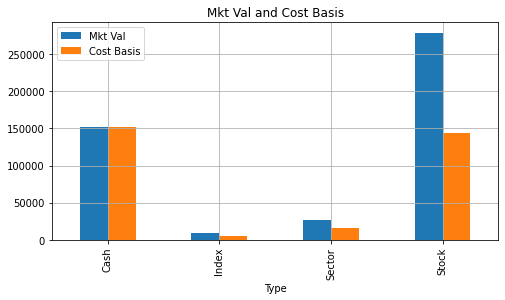

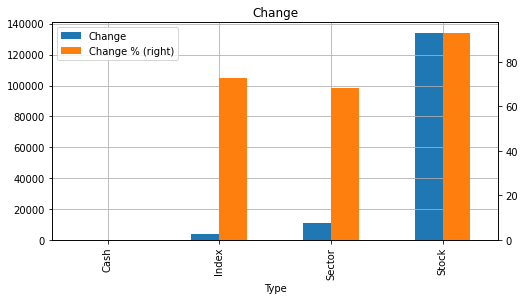

In [7]:
df_final_type.plot(y=['Mkt Val', 'Cost Basis'],
                   kind='bar', figsize=fig_size_2, grid=True,
                   title='Mkt Val and Cost Basis')
df_final_type.plot(y=['Change', 'Change %'], secondary_y=['Change %'],
                   kind='bar', figsize=fig_size_2, grid=True,
                   title='Change')

In [8]:
print('Portfolio value:', round(df_final_type['Mkt Val'].sum(), 2))
print('Cost basis:', round(df_final_type['Cost Basis'].sum(), 2))
print('Change:', round(df_final_type['Change'].sum(), 2))
print('Change %:', round(100*df_final_type['Change'].sum()/df_final_type['Cost Basis'].sum(), 2))

Portfolio value: 466465.85
Cost basis: 317243.87
Change: 149221.98
Change %: 47.04


In [9]:
def calc_portfolio_value_and_beta(period=three_months):
    mkt_val = (df[df['Ticker'] != 'CASH'].groupby('Date').sum()['Mkt Val']) + df[df['Ticker'] == 'CASH'][['Mkt Val']].values[0]
    mkt_val = mkt_val.reset_index()

    cost_basis = (df[df['Ticker'] != 'CASH'].groupby('Date').sum()['Cost Basis']) + df[df['Ticker'] == 'CASH'][['Cost Basis']].values[0]
    cost_basis = cost_basis.reset_index()

    period = period

    dff = mkt_val[(mkt_val['Date'] >= period) & (mkt_val['Date'] <= end_date)].set_index('Date')
    dff['Cost Basis'] = cost_basis[(cost_basis['Date'] >= period) & (cost_basis['Date'] <= end_date)].set_index('Date')['Cost Basis']

    dff['Return'] = dff['Mkt Val'] - dff['Cost Basis']
    dff['% Return'] = 100*(dff['Mkt Val'] - dff['Cost Basis'])/dff['Cost Basis']
    dff['% Chg Portfolio'] = 100*(dff['Mkt Val']-dff.head(1)['Mkt Val'].values[0])/dff.head(1)['Mkt Val'].values[0]
    dff['Close IVV'] = df[(df['Ticker'] == 'IVV') & (df['Date'] >= period) & (df['Date'] <= end_date)][['Date', 'Close']].set_index('Date')
    dff['% Chg IVV'] = 100*(dff['Close IVV']-dff.head(1)['Close IVV'].values[0])/dff.head(1)['Close IVV'].values[0]

    model = linear_model.LinearRegression()
    model.fit(np.array(dff[['% Chg IVV']]), np.array(dff[['% Chg Portfolio']]))

    dff['% Chg Pred'] = model.predict(np.array(dff[['% Chg IVV']]))
    dff = dff.round(2)

    dff.plot(y=['Mkt Val', '% Return'], secondary_y='% Return', color=['green', 'green'],
             figsize=fig_size_1, grid=True, title='Portfolio Value')

    dff.plot(y=['% Chg Portfolio', '% Chg IVV'], figsize=fig_size_1, grid=True, title='Portfolio v/s IVV')

    fig, axes = plt.subplots(sharex=True)
    dff.plot(x='% Chg IVV', y='% Chg Portfolio', kind='scatter',
             ax=axes, figsize=fig_size_3, grid=True, title='Portfolio v/s IVV')
    dff.plot(x='% Chg IVV', y='% Chg Pred', kind='line', color='Red',
             ax=axes, figsize=fig_size_3, grid=True, title='Portfolio v/s IVV')

    print('Chg Portfolio:', dff.tail(1)['% Chg Portfolio'].values[0])
    print('Chg IVV:', dff.tail(1)['% Chg IVV'].values[0])

    print('Std dev portfolio', round(100*dff.pct_change().std()['Mkt Val'], 3))
    print('Std dev IVV', round(100*dff.pct_change().std()['Close IVV'], 3))

    print('Beta:', round(model.coef_[0][0], 3))

Chg Portfolio: 2.51
Chg IVV: 1.86
Std dev portfolio 0.412
Std dev IVV 0.542
Beta: 0.947


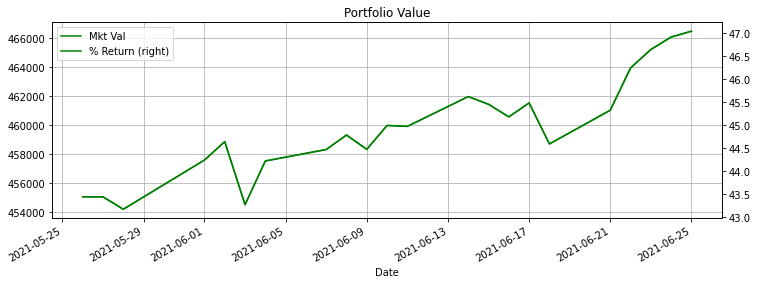

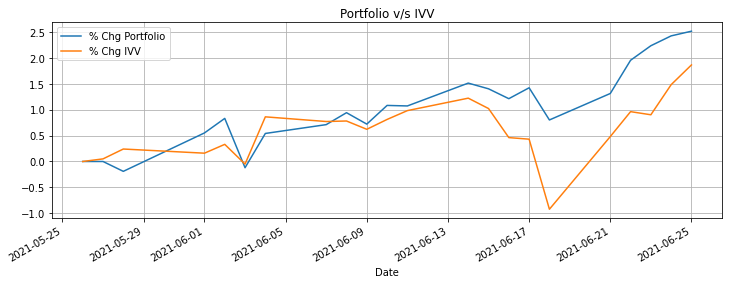

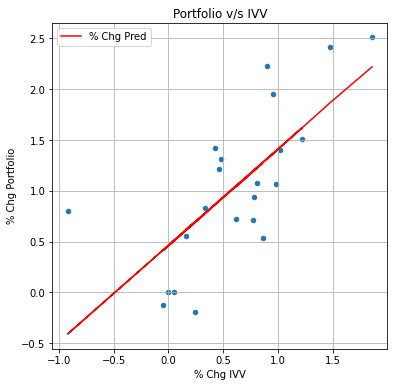

In [10]:
calc_portfolio_value_and_beta(one_month)

Chg Portfolio: 5.01
Chg IVV: 7.8
Std dev portfolio 0.619
Std dev IVV 0.695
Beta: 0.478


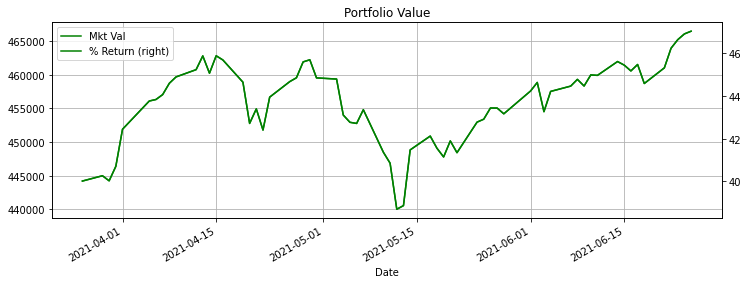

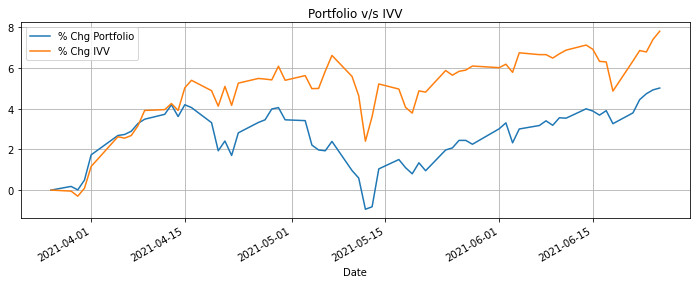

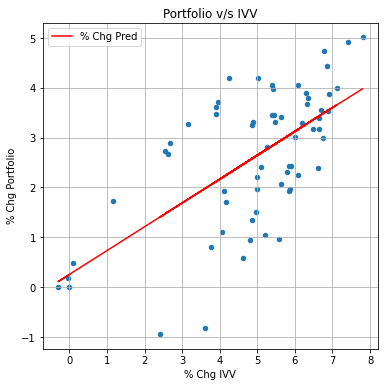

In [11]:
calc_portfolio_value_and_beta(three_months)